In [2]:
import numpy as np
import matplotlib.pyplot as plt

import powerlaw
import os

# Since we have to save lots of figures
def savefig(fname):
    plt.savefig(os.path.join('source/images/', fname), bbox_inches='tight')

## Loading data

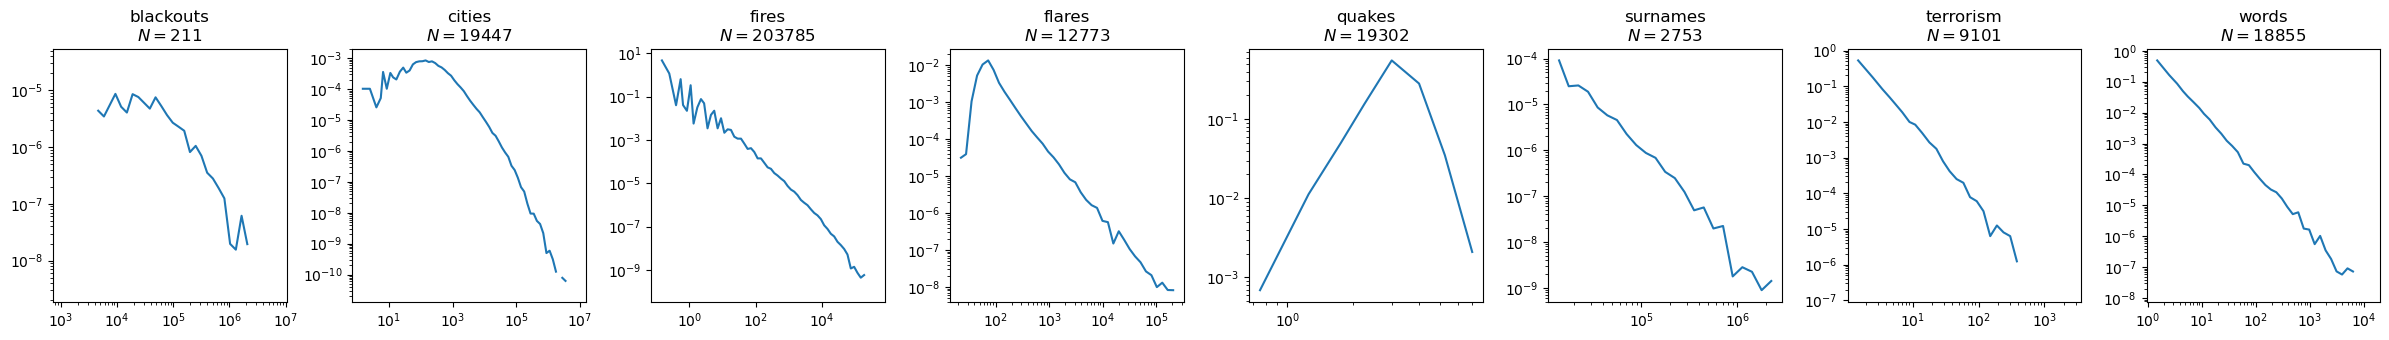

In [3]:
powerlaw.plot_test_datasets()
savefig('test_datasets.png')

## Visualization

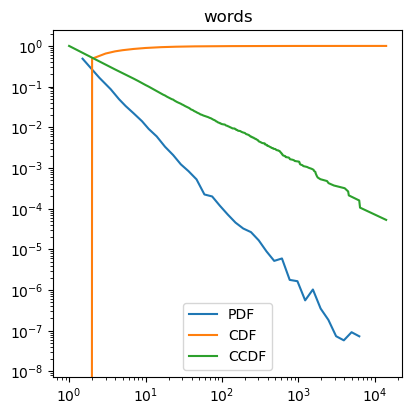

In [7]:
data = powerlaw.load_test_dataset('words')

# These accept matplotlib plot keywords like 'label'
powerlaw.plot_pdf(data, label='PDF')
powerlaw.plot_cdf(data, label='CDF')
powerlaw.plot_ccdf(data, label='CCDF')
plt.legend()
plt.title('words')
plt.gcf().set_size_inches((4.5,4.5))
savefig('words_dists.png')
plt.show()

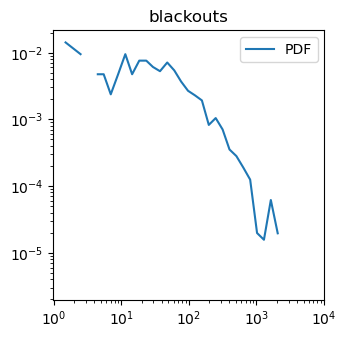

In [25]:
data = powerlaw.load_test_dataset('blackouts')

powerlaw.plot_pdf(data / 1e3, linear_bins=False, label='PDF')
plt.legend()
plt.title('blackouts')
plt.gcf().set_size_inches((3.5,3.5))
savefig('blackouts_pdf.png')
plt.show()

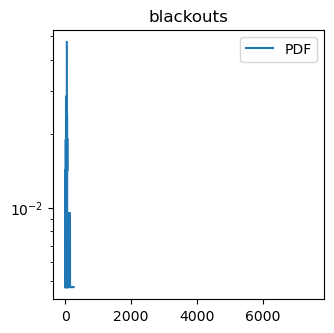

In [26]:
data = powerlaw.load_test_dataset('blackouts')

#powerlaw.plot_pdf(data, linear_bins=False, label='PDF')
powerlaw.plot_pdf(data / 1e3, linear_bins=True, label='PDF')
plt.legend()
plt.title('blackouts')
plt.gcf().set_size_inches((3.5,3.5))
savefig('blackouts_pdf_linear.png')
plt.show()

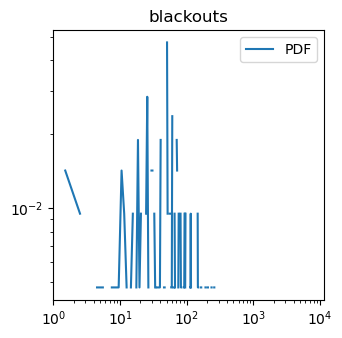

In [27]:
data = powerlaw.load_test_dataset('blackouts')

#powerlaw.plot_pdf(data, linear_bins=False, label='PDF')
powerlaw.plot_pdf(data / 1e3, linear_bins=True, label='PDF')
plt.legend()
plt.title('blackouts')
plt.xscale('log')
plt.gcf().set_size_inches((3.5,3.5))
savefig('blackouts_pdf_linear_log.png')
plt.show()

Calculating best minimal value for power law fit


Fitting xmin: 100%|███████████████████████████████████████████████| 2824/2824 [00:00<00:00, 4287.79it/s]
/home/jack/miniconda3/envs/311/lib/python3.11/site-packages/powerlaw/distributions.py:671: UserWarning: Fitted parameters are very close to the edge of parameter ranges; consider changing these ranges.
  warnings.warn('Fitted parameters are very close to the edge of parameter ranges; consider changing these ranges.')


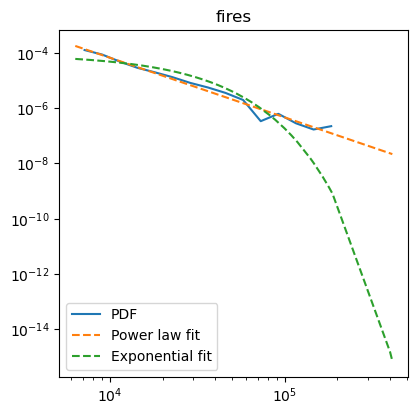

In [28]:
data = powerlaw.load_test_dataset('fires')

fit = powerlaw.Fit(data)

# Plot the distributions based on the data
# No need to pass the data since the Fit already has it
fit.plot_pdf(label='PDF')

# Plot some fits
fit.power_law.plot_pdf(linestyle='--', label='Power law fit')
fit.exponential.plot_pdf(linestyle='--', label='Exponential fit')
plt.title('fires')

plt.legend()
plt.gcf().set_size_inches((4.5,4.5))

savefig('fires_pdf_and_fit.png')
plt.show()

## Identifying the scaling range

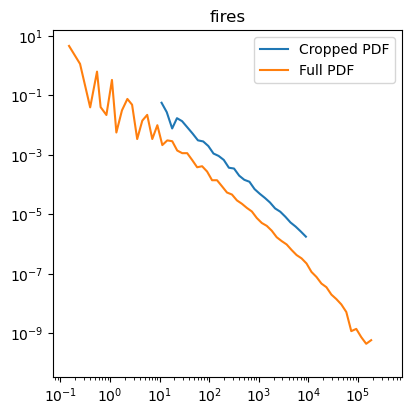

In [24]:
data = powerlaw.load_test_dataset('fires')

xmin = 10
xmax = 1e4

fit = powerlaw.Fit(data, xmin=xmin, xmax=xmax)

fit.plot_pdf(label='Cropped PDF')
fit.plot_pdf(original_data=True, label='Full PDF')
plt.title('fires')
plt.legend()
plt.gcf().set_size_inches((4.5,4.5))
savefig('fires_pdf_cropped.png')
plt.show()

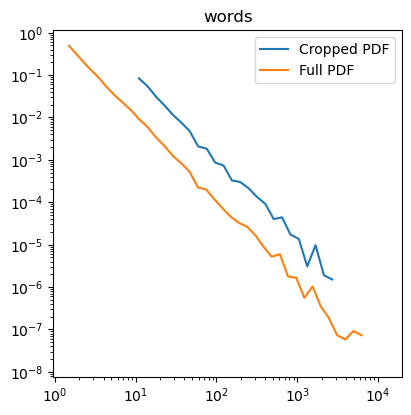

In [23]:
data = powerlaw.load_test_dataset('words')

xmin = 10
xmax = 1e4

fit = powerlaw.Fit(data, xmin=xmin, xmax=xmax)

fit.plot_pdf(label='Cropped PDF')
fit.plot_pdf(original_data=True, label='Full PDF')
plt.title('words')
plt.legend()
plt.gcf().set_size_inches((4.5,4.5))
savefig('words_pdf_cropped.png')
plt.show()

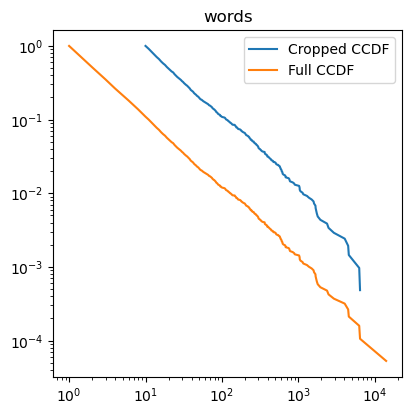

In [29]:
data = powerlaw.load_test_dataset('words')

xmin = 10
xmax = 1e4

fit = powerlaw.Fit(data, xmin=xmin, xmax=xmax)

fit.plot_ccdf(label='Cropped CCDF')
fit.plot_ccdf(original_data=True, label='Full CCDF')
plt.title('words')
plt.legend()
plt.gcf().set_size_inches((4.5,4.5))
savefig('words_ccdf_cropped.png')
plt.show()

## Continuous and discrete data

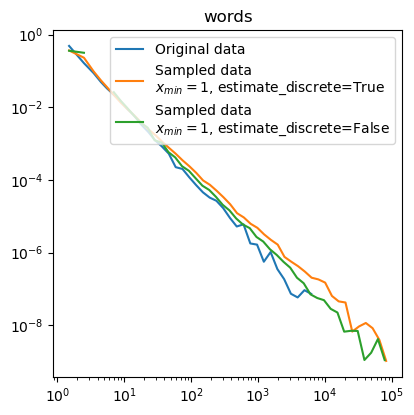

In [3]:
data = powerlaw.load_test_dataset('words')

powerlaw.plot_pdf(data[data >= 1], label='Original data')

fit = powerlaw.Fit(data, xmin=1, discrete=True, estimate_discrete=True)
samples = fit.power_law.generate_random(size=(100000))
samples = samples[samples <= 1e5]
powerlaw.plot_pdf(samples, label='Sampled data\n$x_{min} = 1$, estimate_discrete=True')

fit = powerlaw.Fit(data, xmin=1, discrete=True, estimate_discrete=False)
samples = fit.power_law.generate_random(size=(100000))
samples = samples[samples <= 1e5]
powerlaw.plot_pdf(samples, label='Sampled data\n$x_{min} = 1$, estimate_discrete=False')

plt.legend()
plt.title('words')
plt.gcf().set_size_inches((4.5,4.5))
savefig('words_generation_1_xmin.png')
plt.show()

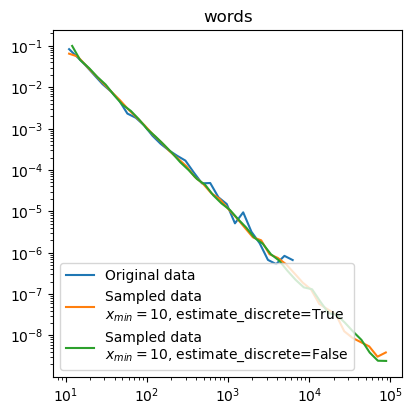

In [5]:
data = powerlaw.load_test_dataset('words')

powerlaw.plot_pdf(data[data >= 10], label='Original data')

fit = powerlaw.Fit(data, xmin=10, discrete=True, estimate_discrete=True)
samples = fit.power_law.generate_random(size=(100000))
samples = samples[samples <= 1e5]
powerlaw.plot_pdf(samples, label='Sampled data\n$x_{min} = 10$, estimate_discrete=True')

fit = powerlaw.Fit(data, xmin=10, discrete=True, estimate_discrete=False)
samples = fit.power_law.generate_random(size=(100000))
samples = samples[samples <= 1e5]
powerlaw.plot_pdf(samples, label='Sampled data\n$x_{min} = 10$, estimate_discrete=False')

plt.legend()
plt.title('words')
plt.gcf().set_size_inches((4.5,4.5))
savefig('words_generation_10_xmin.png')
plt.show()

In [20]:
data = np.genfromtxt('../testing/reference_data/blackouts.txt')
fit = powerlaw.Fit(data, xmin=10, discrete=True, estimate_discrete=False)
samples = fit.exponential.generate_random(n=1)
samples

KeyboardInterrupt: 

In [11]:
np.max(data)

7500000.0